Notebook used to evaluate performance when using the SGD optimiser. This was done in Google Colab using their GPUs. Due to timeouts, I saved the performance metrics and model parameters after each experiment in a `metrics/` and `models/` folder respectively. For the plotting, I simply reload the metrics using the pickle module. This made dealing with timeouts much easier.

Since re-running this is time consuming, all the metrics can be found [here](https://drive.google.com/drive/folders/1jW4ZYS3b3EqBKgjM60WFmU35keQXXDHh?usp=sharing) and the saved models [here](https://drive.google.com/drive/folders/1GKAskrUAiC9p6lK9z9KHB_Y325FTbyrO?usp=sharing). Download them and place them in the same directory as this notebook. You can then simply re-run the plotting cells.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/EPFL/Optimisation for ML/EPFL-OPTML-project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/EPFL/Optimisation for ML/EPFL-OPTML-project


In [2]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

import pickle
import model
import train
import data
#from data import CIFAR10RandomLabels

from torchvision.datasets import CIFAR10
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torchvision.transforms as transforms
import random

In [8]:
import os
os.makedirs('metrics/',exist_ok=True)
os.makedirs('models/',exist_ok=True)

# Label corruption

In [ ]:
accuracies = []
losses = []
for p in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    print(f"Corruption probability = {int(p*100)}%")
    train_loader, test_loader = data.dataload(batch_size=64, corrupt_prob=p)
    alexnet, device = model.loadmodel()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum = 0.9, weight_decay=1e-4)
    accs, ls = train.train(alexnet, optimizer, criterion, train_loader, device)
    
    accuracies.append(accs)
    losses.append(ls)
    torch.save(alexnet.state_dict(), f'models/alexnet_sgd_{int(p*100)}%.pt')
    pickle.dump([accs,ls], open(f'metrics/sgd_acc_loss_{int(p*100)}%.pkl', 'wb'))
    print()

Corruption probability = 0%
Files already downloaded and verified
Files already downloaded and verified
cuda:0
Epoch 1 accuracy: 76.69. Loss: 0.669
Epoch 2 accuracy: 86.77. Loss: 0.379
Epoch 3 accuracy: 90.21. Loss: 0.283
Epoch 4 accuracy: 92.61. Loss: 0.214
Epoch 5 accuracy: 94.80. Loss: 0.153
Epoch 6 accuracy: 95.90. Loss: 0.116
Epoch 7 accuracy: 97.96. Loss: 0.065
Epoch 8 accuracy: 98.68. Loss: 0.046
Epoch 9 accuracy: 99.33. Loss: 0.026
Epoch 10 accuracy: 99.88. Loss: 0.010
Epoch 11 accuracy: 99.94. Loss: 0.006
Epoch 12 accuracy: 100.00. Loss: 0.002
Finished Training of AlexNet
Number of epochs until 100% accuracy: 12
Time taken: 567.3731398582458

Corruption probability = 20%
Files already downloaded and verified
Files already downloaded and verified
cuda:0
Epoch 1 accuracy: 61.20. Loss: 1.387
Epoch 2 accuracy: 69.44. Loss: 1.193
Epoch 3 accuracy: 71.95. Loss: 1.100
Epoch 4 accuracy: 73.92. Loss: 1.018
Epoch 5 accuracy: 75.59. Loss: 0.940
Epoch 6 accuracy: 77.21. Loss: 0.849
Epoch 

Initial plots just to get an idea of performance

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


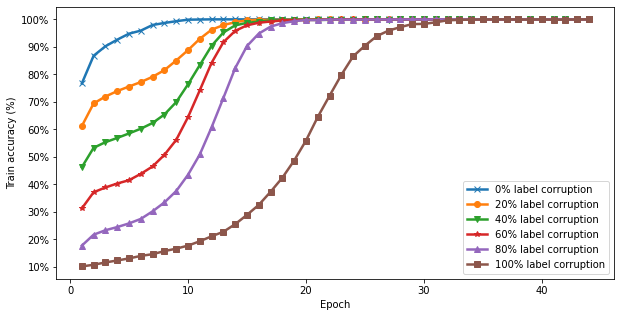

In [ ]:
metrics = []
for p in [0, 20, 40, 60, 80, 100]:
    metrics.append(pickle.load(open(f'metrics/sgd_acc_loss_{p}%.pkl', 'rb')))

plt.figure(figsize=(10,5))
markers = ['x','o','v','*','^','s']
for m, marker in zip(metrics, markers):
    last = m[0][-1]
    acc = m[0] + [last]*(44-len(m[0]))
    plt.plot(range(1,45,1),acc, marker=marker, linewidth=2.5)
plt.legend([f'{x}% label corruption' for x in [0, 20, 40, 60, 80, 100]])
plt.ylabel('Train accuracy (%)')
plt.xlabel('Epoch')
plt.yticks(range(10,110,10), [f'{x}%' for x in range(10,110,10)]);
plt.savefig('SGD_label_corruption.eps')
#plt.xticks(range(1,45,4))

Text(0.5, 0, 'Epoch')

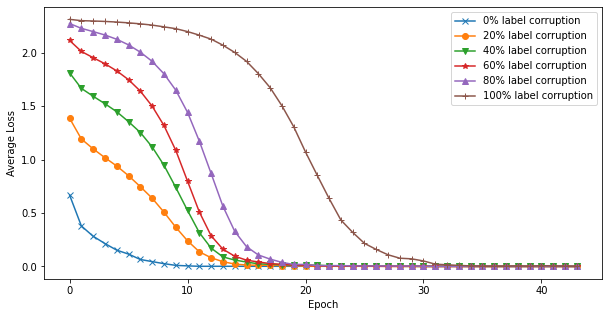

In [ ]:
plt.figure(figsize=(10,5))
markers = ['x','o','v','*','^','+']
for m, marker in zip(metrics, markers):
    last = m[1][-1]
    acc = m[1] + [last]*(44-len(m[1]))
    plt.plot(acc, marker=marker)
plt.legend([f'{x}% label corruption' for x in [0, 20, 40, 60, 80, 100]])
plt.ylabel('Average Loss')
plt.xlabel('Epoch')

## Test evaluation
Here we see how well the models generalise to the unseen test set

In [ ]:
train_loader, test_loader = data.dataload(batch_size=64, perm_level=0)
for p in [0, 20, 40, 60, 80, 100]:
    print(f"Corruption probability = {p}%")
    alexnet, device = utils.loadmodel()
    alexnet.load_state_dict(torch.load(f'models/alexnet_sgd_{p}%.pt'))

    eval_model(alexnet, test_loader)

Files already downloaded and verified
Files already downloaded and verified
Corruption probability = 0%
cuda:0
Accuracy:  88.44999999999999
Average loss:  0.5442793324684642
Corruption probability = 20%
cuda:0
Accuracy:  78.94
Average loss:  1.176780030795723
Corruption probability = 40%
cuda:0
Accuracy:  66.12
Average loss:  1.8852679623160393
Corruption probability = 60%
cuda:0
Accuracy:  49.49
Average loss:  3.066807995176619
Corruption probability = 80%
cuda:0
Accuracy:  30.19
Average loss:  4.727142493436291
Corruption probability = 100%
cuda:0
Accuracy:  9.89
Average loss:  8.411445918356536


## Train evaluation
Here we plot the evolution of accuracies with different levels of corruption

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


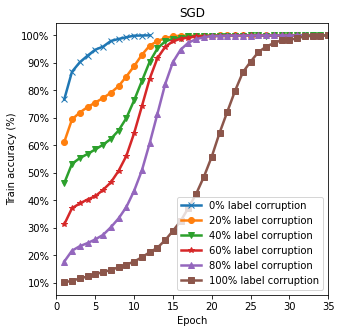

In [12]:
#metrics = []
#for p in [0, 20, 40, 60, 80, 100]:
#    metrics.append(pickle.load(open(f'metrics/sgd_acc_loss_{p}%.pkl', 'rb')))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
markers = ['x','o','v','*','^','s']
for m, marker in zip(metrics, markers):
    acc = m[0] 
    plt.plot(range(1,len(acc)+1,1),acc, marker=marker, linewidth=2.5)
plt.legend([f'{x}% label corruption' for x in [0, 20, 40, 60, 80, 100]])
plt.ylabel('Train accuracy (%)')
plt.xlabel('Epoch')
plt.yticks(range(10,110,10), [f'{x}%' for x in range(10,110,10)]);
plt.title('SGD')
plt.xlim([0,35])
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('sgd_corrupt_box_stop.eps')
#plt.xticks(range(1,45,4))

# Shuffled pixels
Here we train the model when permuting pixels along the x-axis, as well as both the x and y-axes.

In [ ]:

for p in [1, 2]:
    print(f"Permutation level = {p}")
    train_loader, test_loader = data.dataload(batch_size=64, perm_level=p)
    alexnet, device = model.loadmodel()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum = 0.9, weight_decay=1e-4)
    accuracies, losses = train.train(alexnet, optimizer, criterion, train_loader, device)

    torch.save(alexnet.state_dict(), f'models/alexnet_sgd_perm_{p}.pt')
    pickle.dump([accuracies,losses], open(f'metrics/sgd_acc_loss_perm_{p}.pkl', 'wb'))
    print()

Permutation level = 1
Files already downloaded and verified
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

cuda:0
Epoch 1 accuracy: 53.48. Loss: 1.294
Epoch 2 accuracy: 64.71. Loss: 0.989
Epoch 3 accuracy: 70.58. Loss: 0.836
Epoch 4 accuracy: 74.32. Loss: 0.726
Epoch 5 accuracy: 78.74. Loss: 0.610
Epoch 6 accuracy: 82.20. Loss: 0.514
Epoch 7 accuracy: 85.24. Loss: 0.422
Epoch 8 accuracy: 88.90. Loss: 0.324
Epoch 9 accuracy: 91.74. Loss: 0.243
Epoch 10 accuracy: 94.52. Loss: 0.169
Epoch 11 accuracy: 96.76. Loss: 0.107
Epoch 12 accuracy: 98.18. Loss: 0.067
Epoch 13 accuracy: 99.38. Loss: 0.031
Epoch 14 accuracy: 99.76. Loss: 0.016
Epoch 15 accuracy: 99.66. Loss: 0.016
Epoch 16 accuracy: 99.97. Loss: 0.005
Epoch 17 accuracy: 100.00. Loss: 0.002
Finished Training of AlexNet
Number of epochs until 100% accuracy: 17
Time taken: 901.672345161438

Permutation level = 2
Files already downloaded and verified
Files already downloaded and verified
cuda:0
Epoch 1 accuracy: 46.28. Loss: 1.479
Epoch 2 accuracy: 57.05. Loss: 1.205
Epoch 3 accuracy: 61.69. Loss: 1.073
Epoch 4 accuracy: 65.92. Loss: 0.960
Ep

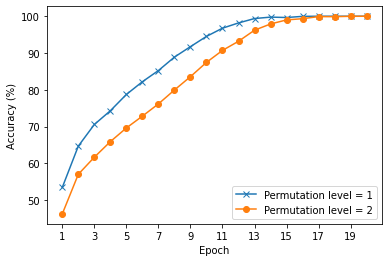

In [ ]:
metrics = []
for p in [1, 2]:
    metrics.append(pickle.load(open(f'metrics/sgd_acc_loss_perm_{p}.pkl', 'rb')))

markers = ['x','o']
for m, marker in zip(metrics, markers):
    last = m[0][-1]
    acc = m[0] + [last]*(20-len(m[0]))
    plt.plot(range(1, len(acc)+1), acc, marker=marker)
plt.legend([f'Permutation level = {x}' for x in [1,2]])
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.xticks(range(1,21,2));

# Random noise

In [ ]:
train_loader, test_loader = data.dataload(batch_size=64, random_noise=True)
alexnet, device = model.loadmodel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum = 0.9, weight_decay=1e-4)
accuracies, losses = train.train(alexnet, optimizer, criterion, train_loader, device)

torch.save(alexnet.state_dict(), f'models/alexnet_sgd_random.pt')
pickle.dump([accuracies,losses], open(f'metrics/sgd_acc_loss_random.pkl', 'wb'))

Files already downloaded and verified
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

cuda:0
Epoch 1 accuracy: 10.22. Loss: 2.305
Epoch 2 accuracy: 9.86. Loss: 2.303
Epoch 3 accuracy: 10.59. Loss: 2.302
Epoch 4 accuracy: 10.78. Loss: 2.302
Epoch 5 accuracy: 10.70. Loss: 2.301
Epoch 6 accuracy: 11.03. Loss: 2.301
Epoch 7 accuracy: 11.09. Loss: 2.300
Epoch 8 accuracy: 11.71. Loss: 2.299
Epoch 9 accuracy: 11.67. Loss: 2.298
Epoch 10 accuracy: 12.15. Loss: 2.296
Epoch 11 accuracy: 12.28. Loss: 2.294
Epoch 12 accuracy: 12.92. Loss: 2.292
Epoch 13 accuracy: 12.79. Loss: 2.288
Epoch 14 accuracy: 13.28. Loss: 2.286
Epoch 15 accuracy: 14.05. Loss: 2.281
Epoch 16 accuracy: 14.64. Loss: 2.275
Epoch 17 accuracy: 15.11. Loss: 2.269
Epoch 18 accuracy: 15.29. Loss: 2.262
Epoch 19 accuracy: 16.32. Loss: 2.250
Epoch 20 accuracy: 17.18. Loss: 2.236
Epoch 21 accuracy: 18.12. Loss: 2.225
Epoch 22 accuracy: 19.07. Loss: 2.205
Epoch 23 accuracy: 20.44. Loss: 2.182
Epoch 24 accuracy: 21.76. Loss: 2.154
Epoch 25 accuracy: 22.88. Loss: 2.126
Epoch 26 accuracy: 25.03. Loss: 2.088
Epoch 27 accura

In [ ]:
train_loader, test_loader = data.dataload(batch_size=64, random_noise=True)
alexnet, device = model.loadmodel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum = 0., weight_decay=1e-4)
accuracies, losses = train.train(alexnet, optimizer, criterion, train_loader, device)

torch.save(alexnet.state_dict(), f'models/alexnet_sgd_random2.pt')
pickle.dump([accuracies,losses], open(f'metrics/sgd_acc_loss_random2.pkl', 'wb'))

Files already downloaded and verified
Files already downloaded and verified
cuda:0
Epoch 1 accuracy: 9.95. Loss: 2.309
Epoch 2 accuracy: 10.11. Loss: 2.304
Epoch 3 accuracy: 10.30. Loss: 2.303
Epoch 4 accuracy: 10.49. Loss: 2.302
Epoch 5 accuracy: 10.42. Loss: 2.302
Epoch 6 accuracy: 10.90. Loss: 2.301
Epoch 7 accuracy: 11.22. Loss: 2.301
Epoch 8 accuracy: 11.42. Loss: 2.300
Epoch 9 accuracy: 11.20. Loss: 2.300
Epoch 10 accuracy: 11.53. Loss: 2.299
Epoch 11 accuracy: 11.40. Loss: 2.299
Epoch 12 accuracy: 11.88. Loss: 2.299
Epoch 13 accuracy: 11.59. Loss: 2.298
Epoch 14 accuracy: 11.92. Loss: 2.297
Epoch 15 accuracy: 12.15. Loss: 2.297
Epoch 16 accuracy: 12.08. Loss: 2.296
Epoch 17 accuracy: 11.98. Loss: 2.296
Epoch 18 accuracy: 12.13. Loss: 2.295
Epoch 19 accuracy: 12.62. Loss: 2.294
Epoch 20 accuracy: 12.61. Loss: 2.294
Epoch 21 accuracy: 12.43. Loss: 2.293
Epoch 22 accuracy: 12.59. Loss: 2.292
Epoch 23 accuracy: 12.84. Loss: 2.291
Epoch 24 accuracy: 13.12. Loss: 2.290
Epoch 25 accura

Text(0.5, 0, 'Epoch')

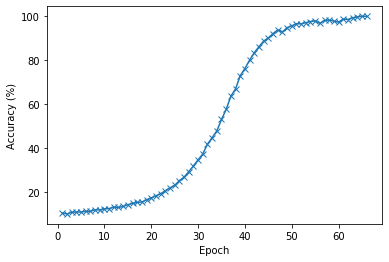

In [ ]:
random = pickle.load(open('metrics/sgd_acc_loss_random.pkl', 'rb'))

plt.plot(range(1, len(random[0])+1), random[0], marker='x')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
#plt.xticks(range(1,21,2));

# All together
Here we plot the different image corruption model performances to see which is the hardest.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


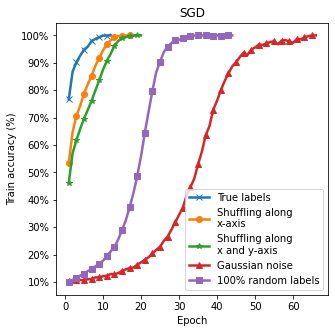

In [17]:
true_labels = pickle.load(open('metrics/sgd_acc_loss_0%.pkl', 'rb'))
random_labels = pickle.load(open('metrics/sgd_acc_loss_100%.pkl', 'rb'))
random_noise = pickle.load(open('metrics/sgd_acc_loss_random.pkl', 'rb'))
shuffled_pixels1 = pickle.load(open('metrics/sgd_acc_loss_perm_1.pkl', 'rb'))
shuffled_pixels2 = pickle.load(open('metrics/sgd_acc_loss_perm_2.pkl', 'rb'))
losses = [true_labels[0], shuffled_pixels1[0], shuffled_pixels2[0], random_noise[0], random_labels[0]]
markers = ['x','o','*', '^', 's']

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for acc, marker in zip(losses, markers):
    last = acc[-1]
    acc = acc #+ [last]*(67-len(acc))
    plt.plot(range(1, len(acc)+1), acc, marker=marker,linewidth=2.5,markevery=2)
plt.legend(['True labels','Shuffling along\nx-axis', 'Shuffling along\nx and y-axis', 'Gaussian noise', '100% random labels'])
plt.ylabel('Train accuracy (%)')
plt.xlabel('Epoch')
plt.yticks(range(10,110,10), [f'{x}%' for x in range(10,110,10)]);
plt.title('SGD')
ax.set_aspect(1./ax.get_data_ratio())

plt.savefig('sgd_comparison_stop.eps')

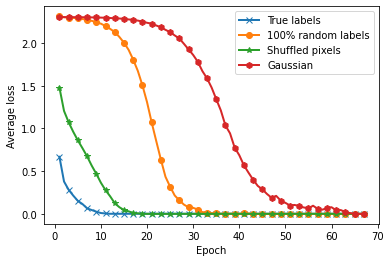

In [ ]:
true_labels = pickle.load(open('metrics/sgd_acc_loss_0%.pkl', 'rb'))
random_labels = pickle.load(open('metrics/sgd_acc_loss_100%.pkl', 'rb'))
random_noise = pickle.load(open('metrics/sgd_acc_loss_random.pkl', 'rb'))
shuffled_pixels = pickle.load(open('metrics/sgd_acc_loss_perm_2.pkl', 'rb'))
losses = [true_labels[1], random_labels[1], shuffled_pixels[1], random_noise[1]]
markers = ['x','o','*','h']

for acc, marker in zip(losses, markers):
    last = acc[-1]
    acc = acc + [last]*(67-len(acc))
    plt.plot(range(1, len(acc)+1), acc, marker=marker,linewidth=2,markevery=2)
plt.legend(['True labels','100% random labels','Shuffled pixels','Gaussian'])
plt.ylabel('Average loss')
plt.xlabel('Epoch');